# Getting dataset from kaggle

In [1]:
!pip install -q kaggle

In [2]:
from google.colab import files

files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"gsvraghavendra","key":"25870b9cfebd03de8ac35af135c2a155"}'}

In [3]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/

In [4]:
! chmod 600 ~/.kaggle/kaggle.json

In [5]:
!kaggle datasets download -d shivamkushwaha/bbc-full-text-document-classification

  0% 0.00/5.59M [00:00<?, ?B/s]
100% 5.59M/5.59M [00:00<00:00, 72.2MB/s]


In [6]:
! unzip bbc-full-text-document-classification.zip

Archive:  bbc-full-text-document-classification.zip
  inflating: bbc-fulltext (document classification)/bbc/README.TXT  
  inflating: bbc-fulltext (document classification)/bbc/business/001.txt  
  inflating: bbc-fulltext (document classification)/bbc/business/002.txt  
  inflating: bbc-fulltext (document classification)/bbc/business/003.txt  
  inflating: bbc-fulltext (document classification)/bbc/business/004.txt  
  inflating: bbc-fulltext (document classification)/bbc/business/005.txt  
  inflating: bbc-fulltext (document classification)/bbc/business/006.txt  
  inflating: bbc-fulltext (document classification)/bbc/business/007.txt  
  inflating: bbc-fulltext (document classification)/bbc/business/008.txt  
  inflating: bbc-fulltext (document classification)/bbc/business/009.txt  
  inflating: bbc-fulltext (document classification)/bbc/business/010.txt  
  inflating: bbc-fulltext (document classification)/bbc/business/011.txt  
  inflating: bbc-fulltext (document classification)/bb

In [7]:
import numpy as np
import pandas as pd
import os

In [8]:
import nltk
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping grammars/basque_grammars.zip.
[nltk_data]    | Downloading package bcp47 to /root/nltk_data...
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   U

True

# Data cleaning and preprocessing

## Converting dataset to csv

In [9]:
import glob
import io
import warnings
warnings.filterwarnings("ignore")

In [10]:
dir_path = []
for dirname, _, filenames in os.walk('/content/bbc'):
    dir_path.append(dirname)

dir_path

['/content/bbc',
 '/content/bbc/business',
 '/content/bbc/tech',
 '/content/bbc/entertainment',
 '/content/bbc/politics',
 '/content/bbc/sport']

In [11]:
def csv(path):
    df = pd.DataFrame()
    txt = []
    label = []
    
    for dirpath in path:
        text_files_path = sorted(glob.glob(os.path.join(dirpath, '*.txt')))
        
        for text_path in text_files_path:
            with io.open(text_path, 'r', encoding='utf-8', errors='ignore') as txt_file:
                txt.append(txt_file.read())
                label.append(dirpath.split('/')[-1])

    df['text'] = txt
    df['label'] = label
    txt, label = [], []
    
    return df

In [12]:
df = csv(dir_path[1:])
df

,text,label
0,Ad sales boost Time Warner profit\n\nQuarterly...,business
1,Dollar gains on Greenspan speech\n\nThe dollar...,business
2,Yukos unit buyer faces loan claim\n\nThe owner...,business
3,High fuel prices hit BA's profits\n\nBritish A...,business
4,Pernod takeover talk lifts Domecq\n\nShares in...,business
...,...,...
2220,Big guns ease through in San Jose\n\nTop-seede...,sport
2221,Almagro continues Spanish surge\n\nUnseeded Ni...,sport
2222,Melzer shocks Agassi in San Jose\n\nSecond see...,sport
2223,Mirza makes Indian tennis history\n\nTeenager ...,sport


<AxesSubplot:>

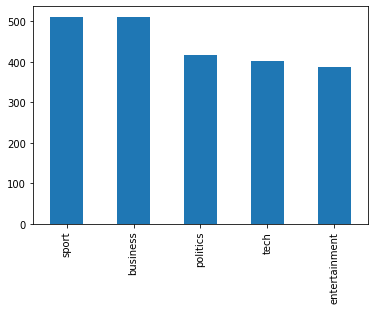

In [13]:
df['label'].value_counts().sort_values(ascending=False).plot(kind='bar')

In [14]:
labels = list(set(df['label']))
labels.sort()
labels

['business', 'entertainment', 'politics', 'sport', 'tech']

In [15]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string

## Cleaning text

In [16]:
def text_cleaning(text):
    # convert to lowercase
    text = text.lower()
    
    # remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    
    # tokenize the text
    tokens = word_tokenize(text)
    
    # remove stopwords
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [token for token in tokens if token not in stop_words]
    
    # remove irrelevant characters
    filtered_tokens = [token for token in filtered_tokens if token.isalpha()]
    
    # join the filtered tokens back into a string
    preprocessed_text = ' '.join(filtered_tokens)
    
    return preprocessed_text


In [17]:
for i in range(len(df)):
  df['text'][i] = text_cleaning(df['text'][i])

In [18]:
df

,text,label
0,ad sales boost time warner profit quarterly pr...,business
1,dollar gains greenspan speech dollar hit highe...,business
2,yukos unit buyer faces loan claim owners embat...,business
3,high fuel prices hit bas profits british airwa...,business
4,pernod takeover talk lifts domecq shares uk dr...,business
...,...,...
2220,big guns ease san jose topseeded americans and...,sport
2221,almagro continues spanish surge unseeded nicol...,sport
2222,melzer shocks agassi san jose second seed andr...,sport
2223,mirza makes indian tennis history teenager san...,sport


# Model

## Tuning dataset for Model

In [19]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 97.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 105.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.3/190.3 KB 21.4 MB/s eta 0:00:00


In [24]:
!pip install datasets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 469.0/469.0 KB 13.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.0/132.0 KB 15.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 KB 7.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 213.0/213.0 KB 24.2 MB/s eta 0:00:00


In [20]:
from transformers import AutoTokenizer
tokenizer = AutoTokenizer.from_pretrained('bert-base-uncased')

In [21]:
def process_data(row):

    text = row['text']
    text = str(text)
    text = ' '.join(text.split())

    encodings = tokenizer(text, padding="max_length", truncation=True, max_length=512)

    label = labels.index(row['label'])

    encodings['label'] = label
    encodings['text'] = text

    return encodings

In [22]:
processed_data = []

for i in range(len(df)):
    processed_data.append(process_data(df.iloc[i]))

In [23]:
from sklearn.model_selection import train_test_split

p_df = pd.DataFrame(processed_data)
train_df, valid_df = train_test_split(p_df, test_size=0.2, random_state=42)

In [25]:
import pyarrow as pa
from datasets import Dataset

train_hg = Dataset(pa.Table.from_pandas(train_df))
valid_hg = Dataset(pa.Table.from_pandas(valid_df))

## Creating and training model

In [37]:
from transformers import AutoModelForSequenceClassification

model = AutoModelForSequenceClassification.from_pretrained(
    'bert-base-uncased',
    num_labels = 5
)

loading configuration file config.json from cache at /root/.cache/huggingface/hub/models--bert-base-uncased/snapshots/0a6aa9128b6194f4f3c4db429b6cb4891cdb421b/config.json
Model config BertConfig {
  "_name_or_path": "bert-base-uncased",
  "architectures": [
    "BertForMaskedLM"
  ],
  "attention_probs_dropout_prob": 0.1,
  "classifier_dropout": null,
  "gradient_checkpointing": false,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "id2label": {
    "0": "LABEL_0",
    "1": "LABEL_1",
    "2": "LABEL_2",
    "3": "LABEL_3",
    "4": "LABEL_4"
  },
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "label2id": {
    "LABEL_0": 0,
    "LABEL_1": 1,
    "LABEL_2": 2,
    "LABEL_3": 3,
    "LABEL_4": 4
  },
  "layer_norm_eps": 1e-12,
  "max_position_embeddings": 512,
  "model_type": "bert",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "pad_token_id": 0,
  "position_embedding_type": "absolute",
  "transformers_version": "4.26.1",
  "type_

In [38]:
from transformers import TrainingArguments, Trainer

training_args = TrainingArguments(output_dir="./result",num_train_epochs=10, evaluation_strategy="epoch")

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_hg,
    eval_dataset=valid_hg,
    tokenizer=tokenizer
)

PyTorch: setting up devices
The default value for the training argument `--report_to` will change in v5 (from all installed integrations to none). In v5, you will need to use `--report_to all` to get the same behavior as now. You should start updating your code and make this info disappear :-).


In [39]:
trainer.train()

***** Running training *****
  Num examples = 1780
  Num Epochs = 10
  Instantaneous batch size per device = 8
  Total train batch size (w. parallel, distributed & accumulation) = 8
  Gradient Accumulation steps = 1
  Total optimization steps = 2230
  Number of trainable parameters = 109486085
The following columns in the training set don't have a corresponding argument in `BertForSequenceClassification.forward` and have been ignored: text, __index_level_0__. If text, __index_level_0__ are not expected by `BertForSequenceClassification.forward`,  you can safely ignore this message.


Epoch,Training Loss,Validation Loss
1,No log,0.096298
2,No log,0.054479
3,0.154900,0.211635
4,0.154900,0.175641
5,0.030700,0.138383
6,0.030700,0.144942
7,0.009700,0.138672
8,0.009700,0.163702
9,0.007400,0.147189
10,0.007400,0.146786


***** Running Evaluation *****
  Num examples = 445
  Batch size = 8
The following columns in the evaluation set don't have a corresponding argument in `BertForSequenceClassification.forward` and have been ignored: text, __index_level_0__. If text, __index_level_0__ are not expected by `BertForSequenceClassification.forward`,  you can safely ignore this message.
***** Running Evaluation *****
  Num examples = 445
  Batch size = 8
The following columns in the evaluation set don't have a corresponding argument in `BertForSequenceClassification.forward` and have been ignored: text, __index_level_0__. If text, __index_level_0__ are not expected by `BertForSequenceClassification.forward`,  you can safely ignore this message.
Saving model checkpoint to ./result/checkpoint-500
Configuration saved in ./result/checkpoint-500/config.json
Model weights saved in ./result/checkpoint-500/pytorch_model.bin
tokenizer config file saved in ./result/checkpoint-500/tokenizer_config.json
Special tokens fil

TrainOutput(global_step=2230, training_loss=0.045490878593226716, metrics={'train_runtime': 1835.3751, 'train_samples_per_second': 9.698, 'train_steps_per_second': 1.215, 'total_flos': 4683502935859200.0, 'train_loss': 0.045490878593226716, 'epoch': 10.0})

## Evaluating model

In [85]:
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score

In [93]:
def predict(text):
    text = text[:2000]
    encoding = tokenizer(text, return_tensors="pt")
    encoding = {k: v.to(trainer.model.device) for k,v in encoding.items()}

    outputs = model(**encoding)

    logits = outputs.logits

    sigmoid = torch.nn.Sigmoid()
    probs = sigmoid(logits.squeeze().cpu())
    probs = probs.detach().numpy()
    label = np.argmax(probs, axis=-1)

    return(label)

In [94]:
predicted_labels = []
for i in valid_df['text']:
  predicted_labels.append(predict(i))

In [105]:
f1 = f1_score(valid_df['label'], predicted_labels, average='micro' )
precision = precision_score(valid_df['label'], predicted_labels, average='micro')
recall = recall_score(valid_df['label'], predicted_labels, average='micro')
accuracy = accuracy_score(valid_df['label'], predicted_labels)

In [106]:
print('F1 score =', f1)
print('Precision =', precision)
print('Recall =', recall)
print('Accuracy =', accuracy)

F1 score = 0.9865168539325843
Precision = 0.9865168539325843
Recall = 0.9865168539325843
Accuracy = 0.9865168539325843


saving model for later use

In [115]:
model.save_pretrained('./model/')

Configuration saved in ./model/config.json
Model weights saved in ./model/pytorch_model.bin


In [116]:
!zip -r /content/model.zip /content/model

  adding: content/model/ (stored 0%)
  adding: content/model/pytorch_model.bin (deflated 7%)
  adding: content/model/config.json (deflated 53%)


In [117]:
files.download("/content/model.zip")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Predicting on some examples

In [40]:
import torch

In [109]:
def get_prediction(text):
    text = text[:2000]
    encoding = tokenizer(text, return_tensors="pt")
    encoding = {k: v.to(trainer.model.device) for k,v in encoding.items()}

    outputs = model(**encoding)

    logits = outputs.logits

    sigmoid = torch.nn.Sigmoid()
    probs = sigmoid(logits.squeeze().cpu())
    probs = probs.detach().numpy()
    label = np.argmax(probs, axis=-1)
    

    return {'class': labels[label], 'probability': probs[label]}

In [110]:
get_prediction('In 1904 the International Association of Football (FIFA) was formed. It has become the world’s most important football organization.')

{'class': 'sport', 'probability': 0.9704645}

In [111]:
get_prediction('stock market had a big loss due to russia ukraine war')

{'class': 'business', 'probability': 0.9997402}

In [112]:
get_prediction('prime minister went to africa')

{'class': 'politics', 'probability': 0.86967695}

In [113]:
get_prediction('creed 3 was an excellent movie')

{'class': 'entertainment', 'probability': 0.9995809}

In [119]:
get_prediction('chatgpt is a new ai tool everyone is going crazy about it')

{'class': 'tech', 'probability': 0.9993667}